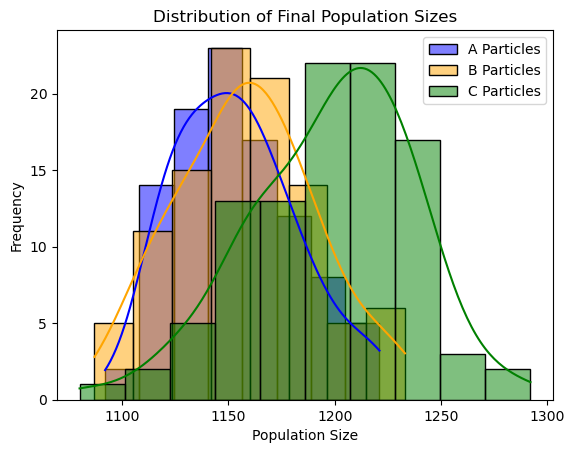

The mean final population size for A particles is: 1153.27
The mean final population size for B particles is: 1158.29
The mean final population size for C particles is: 1198.44


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

num_A_initial = 10
num_B_initial = 500
num_C_initial = 3000
num_collisions = 10000
num_simulations = 100

def simulate_collisions(num_A, num_B, num_C, num_collisions):
    for _ in range(num_collisions):
        particles = ['A'] * num_A + ['B'] * num_B + ['C'] * num_C
        particle1, particle2 = random.sample(particles, 2)
        if {particle1, particle2} == {'A', 'B'}:
            num_A -= 1
            num_B -= 1
            num_C += 2
        elif {particle1, particle2} == {'A', 'C'}:
            num_A -= 1
            num_C -= 1
            num_B += 2
        elif {particle1, particle2} == {'B', 'C'}:
            num_B -= 1
            num_C -= 1
            num_A += 2
            
    return num_A, num_B, num_C

final_populations = {'A': [], 'B': [], 'C': []}
for _ in range(num_simulations):
    final_A, final_B, final_C = simulate_collisions(num_A_initial, num_B_initial, num_C_initial, num_collisions)
    final_populations['A'].append(final_A)
    final_populations['B'].append(final_B)
    final_populations['C'].append(final_C)

means = {particle: np.mean(final_populations[particle]) for particle in final_populations}
sns.histplot(final_populations['A'], kde=True, color='blue', label='A Particles')
sns.histplot(final_populations['B'], kde=True, color='orange', label='B Particles')
sns.histplot(final_populations['C'], kde=True, color='green', label='C Particles')
plt.legend()
plt.title('Distribution of Final Population Sizes')
plt.xlabel('Population Size')
plt.ylabel('Frequency')
plt.show()

for particle in means:
    print(f"The mean final population size for {particle} particles is: {means[particle]}")